## Oscillator 01

Solution of equation $ \ddot x = - \sin(x) $ with 

(1) forward Euler

(2) Runge Kutta 4

(3) Verlet Störmer

(The code is used to produce the figures in lecture01)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# force as function of x:
def f(x):
    return -np.sin(x)

def energy(x,v):
    return 0.5*v*v-np.cos(x)



In [3]:
# update variables (x_n,v_n) to (x_{n+1},v_{n+1}) using forward Euler 
def euler_step(xn,vn,h):
    xn1 = xn + h*vn
    vn1 = vn + h*f(xn)
    return xn1,vn1


def euler_full(h,nmax,x0,v0):
    xn=x0
    vn=v0
    xpoints = np.zeros(nmax)
    vpoints = np.zeros(nmax)
    tpoints = np.zeros(nmax)
    for n in range(nmax):
        tn=n*h
        tpoints[n]=tn
        xpoints[n]=xn
        vpoints[n]=vn
        xn,vn=euler_step(xn,vn,h)
    return tpoints,xpoints,vpoints



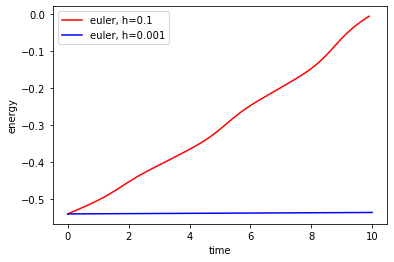

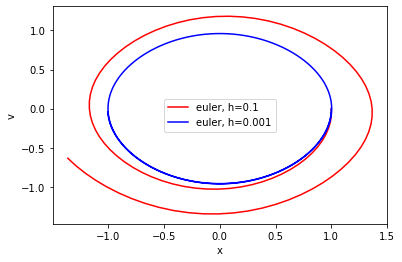

In [4]:
fig, ax = plt.subplots() 

t1,x1,v1=euler_full(0.1,100,1.0,0.0)
t2,x2,v2=euler_full(0.001,10000,1.0,0.0)


#plt.plot(xpoints, vpoints)
ax.set_xlabel('time')
ax.set_ylabel('energy')
ax.plot(t1,energy(x1, v1),'r-',label='euler, h=0.1')
ax.plot(t2,energy(x2, v2),'b-',label='euler, h=0.001')
ax.legend()
plt.show()

ax.set_xlabel('x')
ax.set_ylabel('v')
ax.plot(x1,v1,'r-',label='euler, h=0.1')
ax.plot(x2,v2,'b-',label='euler, h=0.001')
ax.legend()
plt.show()

fig, ax = plt.subplots() 

ax.set_xlabel('x')
ax.set_ylabel('v')
ax.plot(x1,v1,'r-',label='euler, h=0.1')
ax.plot(x2,v2,'b-',label='euler, h=0.001')
ax.legend()
plt.show()



In [5]:
def rk4_step(xn,vn,h):
    k1x = vn
    k1v = f(xn)
    k2x = vn+h*k1v/2
    k2v = f(xn+h*k1x/2)
    k3x = vn+h*k2v/2
    k3v = f(xn+h*k2x/2)
    k4x = vn+h*k3v
    k4v = f(xn+h*k3x)
    kx = (k1x+2*k2x+2*k3x+k4x)/6
    kv = (k1v+2*k2v+2*k3v+k4v)/6
    xn = xn + h*kx
    vn = vn + h*kv
    return xn,vn

def rk4_full(h,nmax,x0,v0):
    xn=x0
    vn=v0
    xpoints = np.zeros(nmax)
    vpoints = np.zeros(nmax)
    tpoints = np.zeros(nmax)
    for n in range(nmax):
        tn=n*h
        tpoints[n]=tn
        xpoints[n]=xn
        vpoints[n]=vn
        xn,vn=rk4_step(xn,vn,h)
    return tpoints,xpoints,vpoints



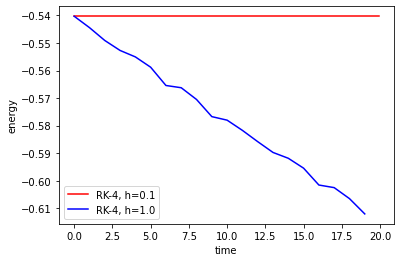

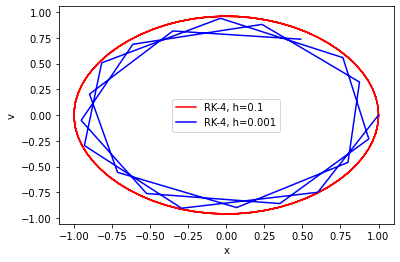

In [6]:
fig, ax = plt.subplots() 

t1,x1,v1=rk4_full(0.1,200,1.0,0.0)
t2,x2,v2=rk4_full(1.0,20,1.0,0.0)


ax.set_xlabel('time')
ax.set_ylabel('energy')
ax.plot(t1,energy(x1, v1),'r-',label='RK-4, h=0.1')
ax.plot(t2,energy(x2, v2),'b-',label='RK-4, h=1.0')
ax.legend()
plt.show()

fig, ax = plt.subplots() 

ax.set_xlabel('x')
ax.set_ylabel('v')
ax.plot(x1,v1,'r-',label='RK-4, h=0.1')
ax.plot(x2,v2,'b-',label='RK-4, h=0.001')
ax.legend()
plt.show()



In [7]:
def verlet_step(xn,vn,vn12,h):
    xn = xn+ vn12*h
    fn=f(xn);
    vn=vn12+0.5*h*fn
    vn12 = vn12 + h*fn
    return xn,vn,vn12

def verlet_full(h,nmax,x0,v0):
    xn=x0
    vn=v0
    fn=f(xn);
    vn12=v0+0.5*h*fn; 
    xpoints = np.zeros(nmax)
    vpoints = np.zeros(nmax)
    tpoints = np.zeros(nmax)
    for n in range(nmax):
        tn=n*h
        tpoints[n]=tn
        xpoints[n]=xn
        vpoints[n]=vn
        xn,vn,vn12=verlet_step(xn,vn,vn12,h)
    return tpoints,xpoints,vpoints



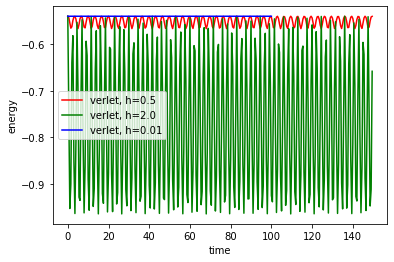

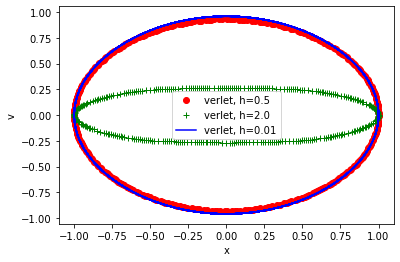

In [8]:
fig, ax = plt.subplots() 

t1,x1,v1=verlet_full(0.5,300,1.0,0.0)
t2,x2,v2=verlet_full(0.01,10000,1.0,0.0)
t3,x3,v3=verlet_full(2.0,300,1.0,0.0)

ax.set_xlabel('time')
ax.set_ylabel('energy')
ax.plot(t1,energy(x1, v1),'r-',label='verlet, h=0.5')
ax.plot(t1,energy(x3, v3),'g-',label='verlet, h=2.0')
ax.plot(t2,energy(x2, v2),'b-',label='verlet, h=0.01')
ax.legend()
plt.show()


fig, ax = plt.subplots() 

ax.set_xlabel('x')
ax.set_ylabel('v')
ax.plot(x1,v1,'ro',label='verlet, h=0.5')
ax.plot(x3,v3,'g+',label='verlet, h=2.0')
ax.plot(x2,v2,'b-',label='verlet, h=0.01')
#plt.plot(energy(xpoints1, vpoints1))
ax.legend()
plt.show()


